<a href="https://colab.research.google.com/github/charvi-jain/SilverChase-DataDriven-ML-model/blob/main/GoldChase_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and PreProcessing


In [18]:
silver_data = pd.read_csv('/content/SilverPrice.csv')

In [19]:
silver_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2023-08-17 00:00:00.000,1915.2,146770,1922.4,1933.5,1914.2
1,2023-08-16 00:00:00.000,1928.3,124766,1933.1,1938.2,1922.0
2,2023-08-15 00:00:00.000,1935.2,161512,1939.4,1944.3,1927.5
3,2023-08-14 00:00:00.000,1944.0,117514,1945.6,1948.2,1934.2
4,2023-08-11 00:00:00.000,1946.6,119090,1944.9,1953.6,1942.7


In [20]:
silver_data.tail()

,Date,Close/Last,Volume,Open,High,Low
2534,2013-08-23 00:00:00.000,1395.8,149116,1376.1,1399.9,1367.8
2535,2013-08-22 00:00:00.000,1370.8,134493,1365.6,1381.4,1354.5
2536,2013-08-21 00:00:00.000,1370.1,137350,1371.0,1378.9,1359.2
2537,2013-08-20 00:00:00.000,1372.6,130096,1364.9,1378.0,1351.6
2538,2013-08-19 00:00:00.000,1365.7,116056,1377.1,1384.1,1362.0


In [21]:
silver_data.shape

(2539, 6)

In [22]:
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2539 non-null   int64  
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 119.1+ KB


In [23]:
silver_data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [24]:
silver_data.describe()

,Close/Last,Volume,Open,High,Low
count,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1467.437456,181738.732178,1467.455967,1477.035880,1457.630721
std,282.891621,99358.470659,283.126968,285.232942,280.366732
min,1049.600000,0.000000,1051.500000,1062.700000,1045.400000
25%,1243.900000,121111.500000,1243.850000,1251.250000,1235.800000
50%,1321.400000,171291.000000,1321.700000,1329.300000,1314.000000
75%,1774.050000,232716.000000,1773.950000,1785.000000,1763.550000
max,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000


In [25]:
correlation = silver_data.corr()

<ipython-input-25-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

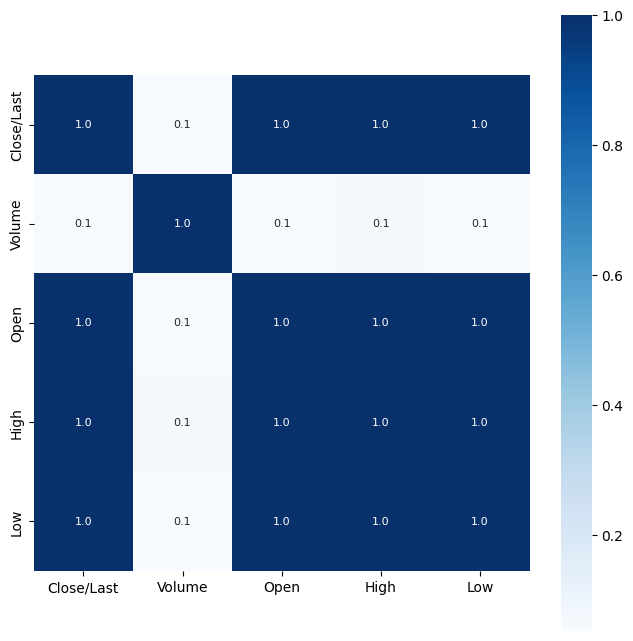

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
print(correlation['Close/Last'])

Close/Last    1.000000
Volume        0.057816
Open          0.998913
High          0.999471
Low           0.999527
Name: Close/Last, dtype: float64


<ipython-input-29-2cfb80a4b393>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['Close/Last'],color='red')


<Axes: xlabel='Close/Last', ylabel='Density'>

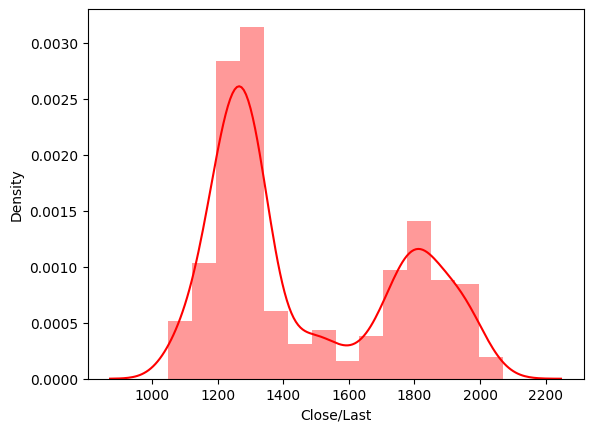

In [29]:
sns.distplot(silver_data['Close/Last'],color='red')

Features and Target

In [30]:
X = silver_data.drop(['Date','Close/Last'],axis=1)
Y = silver_data['Close/Last']

In [31]:
print(X)

      Volume    Open    High     Low
0     146770  1922.4  1933.5  1914.2
1     124766  1933.1  1938.2  1922.0
2     161512  1939.4  1944.3  1927.5
3     117514  1945.6  1948.2  1934.2
4     119090  1944.9  1953.6  1942.7
...      ...     ...     ...     ...
2534  149116  1376.1  1399.9  1367.8
2535  134493  1365.6  1381.4  1354.5
2536  137350  1371.0  1378.9  1359.2
2537  130096  1364.9  1378.0  1351.6
2538  116056  1377.1  1384.1  1362.0

[2539 rows x 4 columns]


In [32]:
print(Y)

0       1915.2
1       1928.3
2       1935.2
3       1944.0
4       1946.6
         ...  
2534    1395.8
2535    1370.8
2536    1370.1
2537    1372.6
2538    1365.7
Name: Close/Last, Length: 2539, dtype: float64


Training and Test Data Splitting

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Evaluation

In [36]:
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[1779.849 1794.669 1237.23  1284.677 1467.953 1728.289 1928.696 1660.819
 1353.79  1180.159 1180.375 1297.453 1294.366 1329.941 1803.083 1262.565
 1791.971 1930.128 1826.066 1257.438 1503.066 1740.69  1928.14  1223.67
 1826.647 1780.907 1269.505 1269.779 1252.857 1165.448 1228.125 1290.714
 1221.178 1292.245 1134.976 1286.643 1545.766 1963.728 1226.28  1946.571
 1271.308 1073.521 1107.477 1760.387 1966.268 1317.586 1261.924 1780.036
 1330.075 1307.487 1074.249 1209.291 1209.265 1705.084 1513.752 1185.966
 1086.822 1825.486 1242.495 1424.72  1168.369 1579.287 1339.584 1124.246
 1789.651 1284.123 1819.976 1218.148 1995.655 1167.786 1806.175 1769.105
 1246.304 1196.939 1277.531 1290.809 1893.183 1249.2   1280.78  1712.512
 1200.483 1277.196 1729.031 1834.672 1975.837 1237.315 1342.417 1736.682
 1195.529 1105.577 1352.133 1254.477 2016.754 1222.033 1312.088 1203.671
 1273.18  1070.109 1212.046 1214.354 1306.904 1948.167 1313.757 1298.228
 1117.25  1296.893 1708.079 1253.943 1276.432 1282.9

In [38]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9994313302180168


In [39]:
Y_test = list(Y_test)

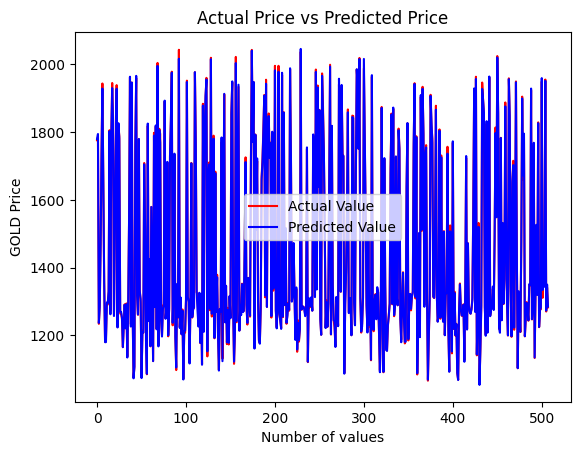

In [40]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()